In [5]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [6]:
keras.__version__

'2.7.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1545 - accuracy: 0.9453 - val_loss: 0.2793 - val_accuracy: 0.8968
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1506 - accuracy: 0.9473 - val_loss: 0.2777 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1489 - accuracy: 0.9471 - val_loss: 0.2788 - val_accuracy: 0.9010
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1457 - accuracy: 0.9489 - val_loss: 0.2734 - val_accuracy: 0.9012
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9498 - val_loss: 0.2842 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1413 - accuracy: 0.9503 - val_loss: 0.2878 - val_accuracy: 0.9002
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1391 - accuracy: 0.9507 - val_loss: 0.2872 - val_accuracy:

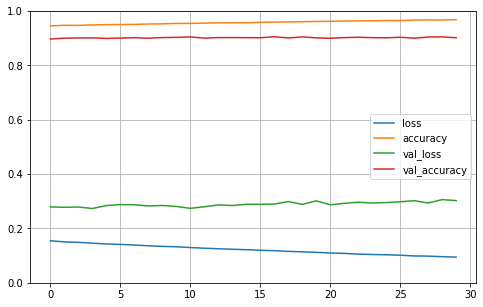

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 76.8623 - accuracy: 0.8546


[76.8622817993164, 0.8546000123023987]